In [72]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [73]:
excel_file_path = './dataset/ABEV3_diario.xlsx'
ABEV3 = pd.read_excel(excel_file_path)
ABEV3 = ABEV3[['Date','Close']]
ABEV3['Date'] = pd.to_datetime(ABEV3['Date']).dt.date

date_string = '2022-01-01'
datetime = datetime.strptime(date_string, '%Y-%m-%d').date()

prices = ABEV3[ABEV3['Date'] > datetime].Close
# .pct_change convert prices and volumes into price returns/percentage changes
returns = prices.pct_change().dropna()
print(returns)

1493   -0.001305
1494   -0.019595
1495   -0.015989
1496   -0.016249
1497    0.008259
          ...   
1718    0.008878
1719   -0.009428
1720    0.010152
1721    0.010050
1722    0.015547
Name: Close, Length: 230, dtype: float64


In [74]:
tickerSymbol = 'ABEV3'

def run_simulation(returns, prices, amt, order, verbose=True, plot=True):
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding and np.random.random() < order):   
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(18,8))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("Dados do preço %s\nBanca Inicial: R$%s\nBanca final: R$%s\nRetorno: %s"%(tickerSymbol, round(init_amt,2), round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

  0%|          | 0/216 [00:00<?, ?it/s]/tmp/ipykernel_14906/3445814090.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  curr_data = returns[:date]
100%|██████████| 216/216 [00:00<00:00, 4757.34it/s]
/tmp/ipykernel_14906/3445814090.py:43: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(prices[14:])


Bought at $15.0
Sold at $15.39999961853027
Actual Return: 0.0267
Bought at $14.93000030517578
Sold at $14.97000026702881
Actual Return: 0.0027
Bought at $14.85000038146973
Sold at $14.52000045776367
Actual Return: -0.0222
Bought at $14.46000003814697
Sold at $14.40999984741211
Actual Return: -0.0035
Bought at $14.53999996185303
Sold at $14.75
Actual Return: 0.0144
Bought at $14.85999965667725
Sold at $15.0600004196167
Actual Return: 0.0135
Bought at $15.07999992370605
Sold at $14.85000038146973
Actual Return: -0.0153
Bought at $14.77000045776367
Sold at $14.44999980926514
Actual Return: -0.0217
Bought at $14.18000030517578
Sold at $13.93000030517578
Actual Return: -0.0176
Bought at $13.43000030517578
Sold at $13.4399995803833
Actual Return: 0.0007
Bought at $13.38000011444092
Sold at $13.18000030517578
Actual Return: -0.0149
Bought at $13.47000026702881
Sold at $13.77999973297119
Actual Return: 0.023
Bought at $14.18000030517578
Sold at $14.38000011444092
Actual Return: 0.0141
Bought a

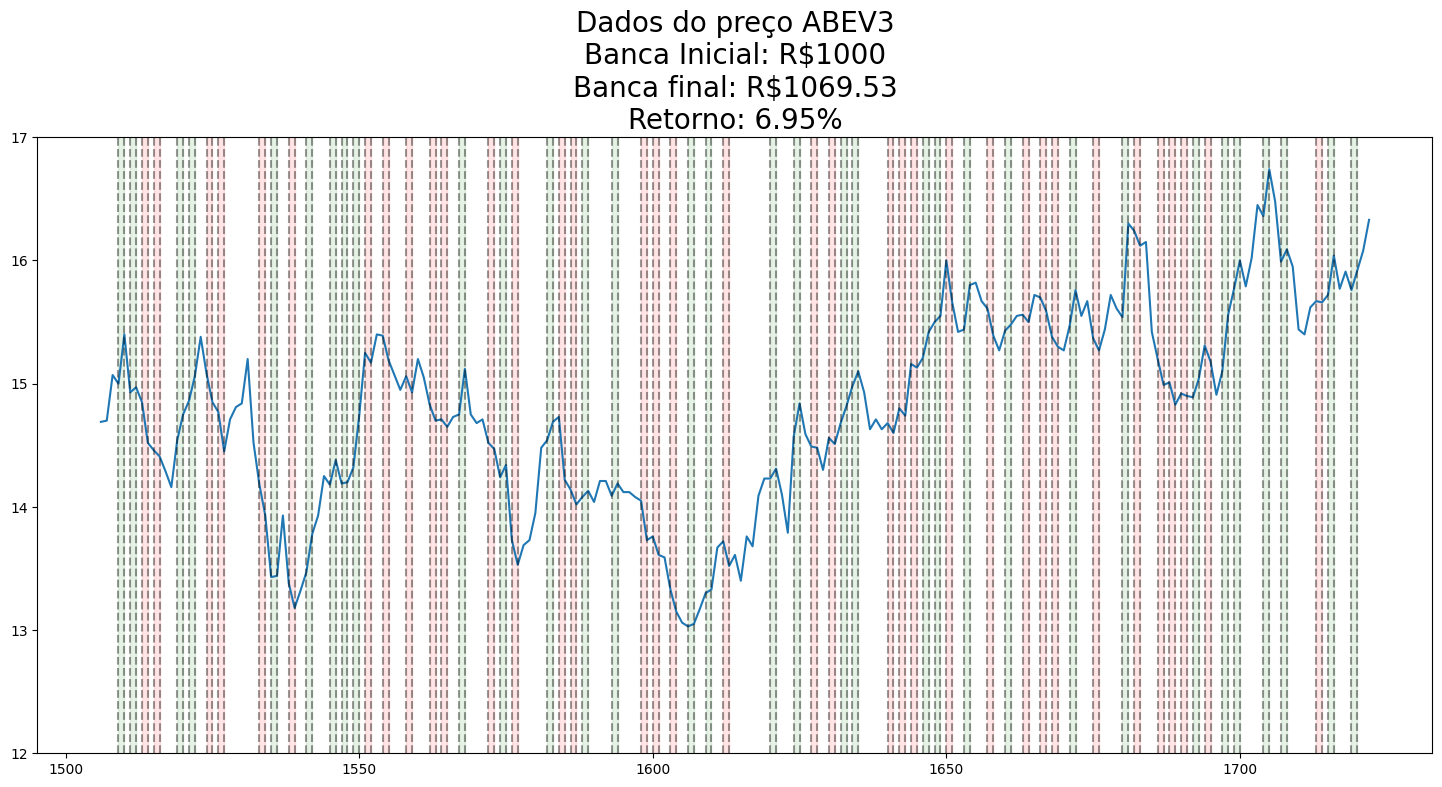

1069.532940462475

In [75]:
run_simulation(returns, prices, 1000, 0.50, verbose=True, plot=True)

In [76]:
# Repeat the random buy simulation 1000 times to make sure we will always be below the average $1000 amount
# of money we started with.
final_amts = [run_simulation(returns, prices, 1000, 0.5, verbose=False, plot=False) for _ in range(1000)]

  0%|          | 0/216 [00:00<?, ?it/s]/tmp/ipykernel_14906/3445814090.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  curr_data = returns[:date]
100%|██████████| 216/216 [00:00<00:00, 5659.52it/s]


/tmp/ipykernel_14906/1846287173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(final_amts)


Text(0.5, 1.0, 'Média: $1043.53\nDesvio Padrão: $118.26')

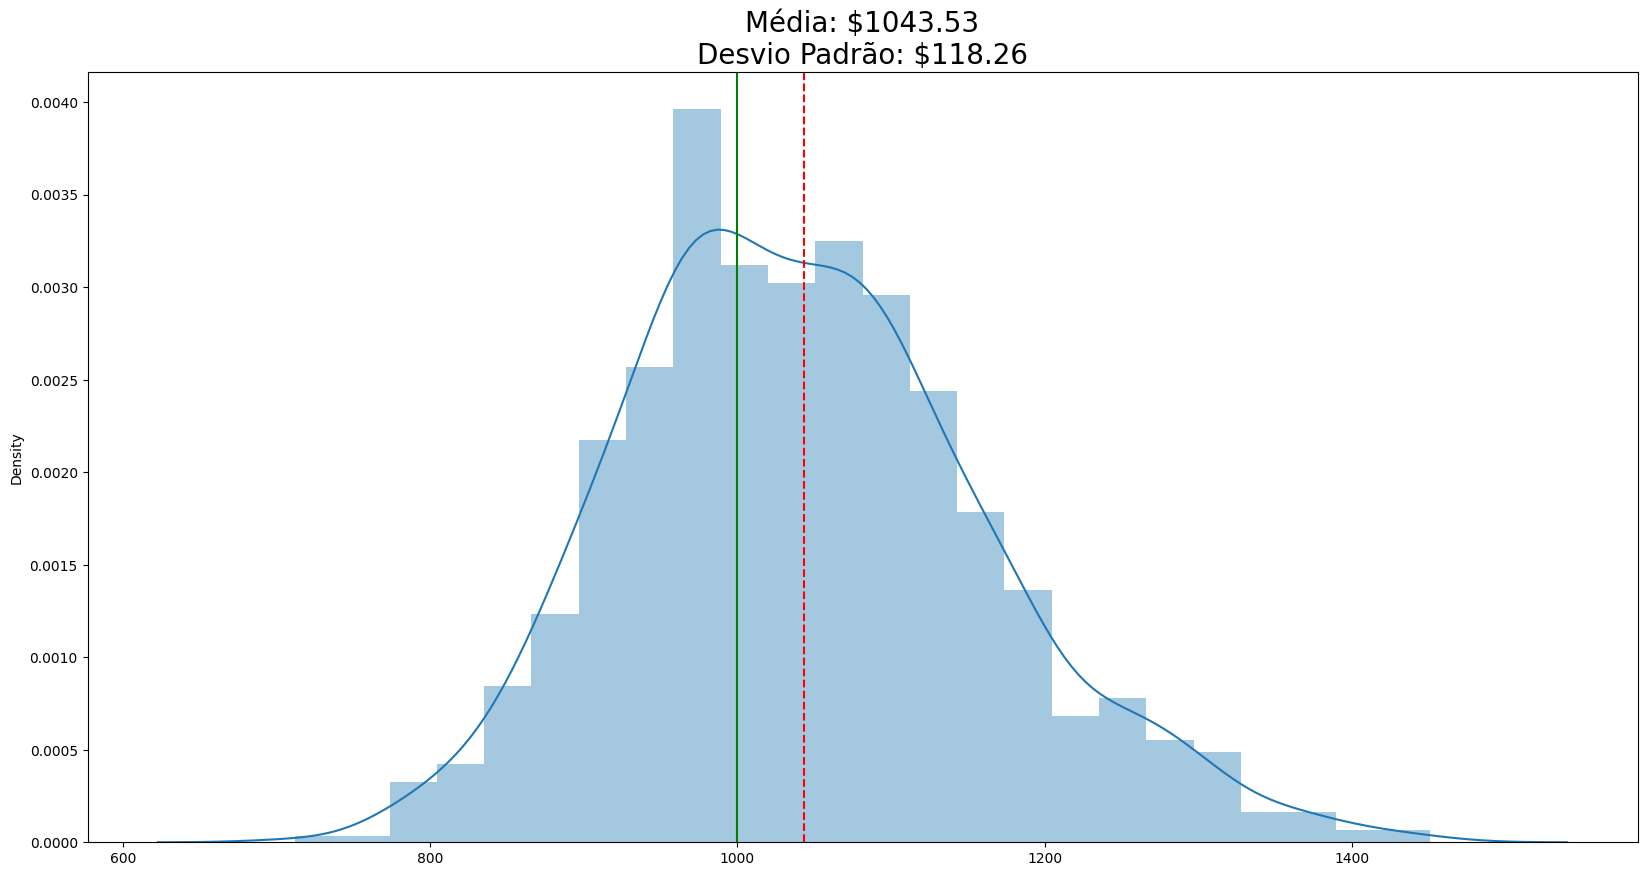

In [77]:
plt.figure(figsize=(20,10))
sb.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='r', linestyle='--')
plt.axvline(1000, color='g')
plt.title('Média: $%s\nDesvio Padrão: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)